In [1]:
import numpy as np 
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [2]:
train_df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

x = train_df.drop(['price_range'], axis=1)
y = train_df['price_range']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.6766666666666666
f1_score 0.6664075836297976
precision_score 0.6672084314848754
recall_score 0.6683210784313725


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='count', ylabel='price_range'>

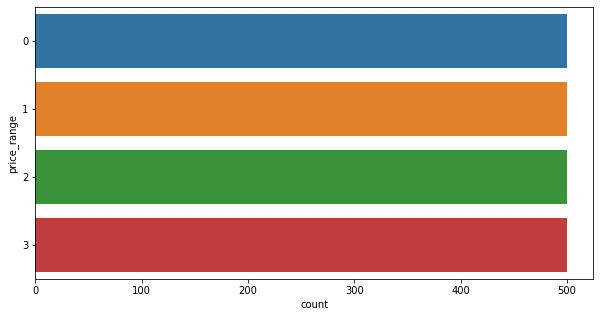

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(y=y)

<AxesSubplot:xlabel='count'>

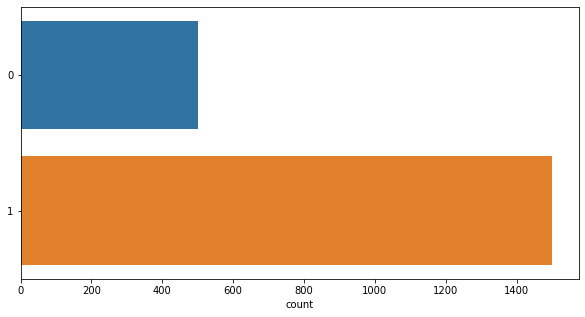

In [5]:
y_new = [0 if yy == 0 else 1 for yy in y]
plt.figure(figsize=(10,5))
sns.countplot(y=y_new)

In [6]:
x = train_df.drop(['price_range'], axis=1)
y = y_new

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.94
f1_score 0.9207001879699248
precision_score 0.9367690058479532
recall_score 0.9073863636363637


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
import random

In [8]:
rand = []
j = 0
while j<1000:
        i = random.randint(0,1999)
        if (i not in rand) and (y[i]==1) :
            rand.append(i)
            j = j+1
  

In [9]:
y = pd.DataFrame(y)
y.drop(index=rand,inplace=True)

In [10]:
x.drop(index=rand,inplace=True)
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,1,248,874,3946,5,2,7,0,0,0


In [15]:
len(y[y==0])

500

In [16]:
len(y[y==1])

500

In [17]:
#I handle inbalance datas with under sampling

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.8866666666666667
f1_score 0.8865406006674083
precision_score 0.8867521367521367
recall_score 0.8864081124355097


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# part6

In [19]:
y=train_df['price_range']

In [20]:
x = train_df.drop(['price_range'], axis=1)

In [21]:
x.shape

(2000, 20)

In [22]:
y.shape

(2000,)

In [26]:
!pip install mlxtend
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(clf,k_features=10,forward=True,scoring='roc_auc')

You should consider upgrading via the 'c:\users\parsa computer\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [27]:
from sklearn import preprocessing
yy = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

In [28]:
features = feature_selector.fit(np.array(x.fillna(0)),yy)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

In [29]:
filtered_features= x.columns[list(features.k_feature_idx_)]
filtered_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores'],
      dtype='object')

# part7

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x[filtered_features], y, test_size=0.3, random_state=42)

In [32]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.8866666666666667
f1_score 0.8865406006674083
precision_score 0.8867521367521367
recall_score 0.8864081124355097


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# part8,9

In [33]:
from sklearn.decomposition import PCA
pca = PCA(0.71)
x_pca = pca.fit_transform(x)
x_pca.shape

(2000, 2)

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [36]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.8016666666666666
f1_score 0.8005721872510466
precision_score 0.8006894624153351
recall_score 0.800498146025972


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# part10

In [37]:
feature_selector = SequentialFeatureSelector(clf,k_features=10,forward=False,scoring='roc_auc')

In [38]:
features = feature_selector.fit(np.array(x.fillna(0)),yy)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\valida

In [39]:
filtered_features= x.columns[list(features.k_feature_idx_)]
filtered_features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores'],
      dtype='object')

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x[filtered_features], y, test_size=0.3, random_state=42)

In [41]:
clf = LogisticRegression(random_state=42)
clf.fit(x_train, y_train)
y_val_predict = clf.predict(x_val)

print('score', clf.score(x_val, y_val))
print('f1_score', f1_score(y_val, y_val_predict, average="macro"))
print('precision_score', precision_score(y_val, y_val_predict, average="macro"))
print('recall_score', recall_score(y_val, y_val_predict, average="macro"))

score 0.3016666666666667
f1_score 0.2795234478899147
precision_score 0.2897427520069029
recall_score 0.29820086593135176


c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# part11

In [42]:
x = train_df.drop(['price_range'], axis=1)
y = train_df['price_range']
clf = LogisticRegression()
clf.fit(x,y)

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
from sklearn.model_selection import cross_val_score
acuracy5 = cross_val_score(clf,x,y.values.reshape(-1,1),cv=5)
acuracy10 =cross_val_score(clf,x,y.values.reshape(-1,1),cv=10)
mse5 = cross_val_score(clf,x,y.values.reshape(-1,1),cv=5,scoring='neg_mean_squared_error')
mse10 = cross_val_score(clf,x,y.values.reshape(-1,1),cv=10,scoring='neg_mean_squared_error')

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was 

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to co

c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\parsa computer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to co

In [48]:
acuracy5.sum()/5

0.6355

In [49]:
mse5.sum()/5

-0.42000000000000004

In [50]:
acuracy10.sum()/10

0.64

In [51]:
mse10.sum()/10

-0.417